In [43]:
# Load the libraries

import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import covariance

In [3]:
# Create a list with 15 Colombia companies and import the data

acciones_colombianas = [
    "ECOPETROL.CL",    
    "BCOLOMBIA.CL",  
    "GRUPOAVAL.CL",
    "GRUPOSURA.CL",
    "CEMARGOS.CL",
    "ISA.CL",    
    "NUTRESA.CL", 
    "CELSIA.CL",  
    "EXITO.CL",   
    "GRUPOARGOS.CL", 
    "BOGOTA.CL",     
    "PFGRUPSURA.CL", 
    "GEB.CL",   
    "CONCONCRET.CL",
    "CORFICOLCF.CL",      
]

In [36]:
# Import data using the Yahoo Finance API

datos = yf.download(acciones_colombianas, start="2004-05-01", end = "2024-05-01", interval = '1mo')['Adj Close']

[*********************100%%**********************]  15 of 15 completed


In [37]:
# View the data frame

datos

Ticker,BCOLOMBIA.CL,BOGOTA.CL,CELSIA.CL,CEMARGOS.CL,CONCONCRET.CL,CORFICOLCF.CL,ECOPETROL.CL,EXITO.CL,GEB.CL,GRUPOARGOS.CL,GRUPOAVAL.CL,GRUPOSURA.CL,ISA.CL,NUTRESA.CL,PFGRUPSURA.CL
Date,,,,,,,,,,,,,,,
2004-05-01,2035.059692,4051.754883,282.834076,7151.646973,NaN,NaN,NaN,NaN,NaN,11179.205078,71.962982,3955.564453,898.849792,NaN,NaN
2004-06-01,2080.282959,4220.827637,281.676605,7282.754395,NaN,NaN,NaN,NaN,NaN,10704.938477,72.420372,3977.455566,978.339661,NaN,NaN
2004-07-01,2133.699951,4625.274414,254.318085,7642.287598,NaN,NaN,NaN,NaN,NaN,10859.500000,72.497040,3785.553955,938.594849,NaN,NaN
2004-08-01,2179.586426,4727.844238,277.052582,7701.992676,NaN,NaN,NaN,NaN,NaN,11130.994141,72.953018,3800.254639,931.618835,NaN,NaN
2004-09-01,2523.731689,4946.650391,339.605469,8478.158203,NaN,NaN,NaN,NaN,NaN,12651.323242,79.634560,5145.413574,1034.096313,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,31444.076172,26505.105469,2837.073486,6026.782227,262.0,13500.0,2270.545898,3510.0,1788.355835,12161.182617,455.722351,28411.728516,15057.773438,44718.195312,13176.162109
2024-01-01,31903.199219,30999.503906,3177.330566,6312.832031,315.0,16500.0,2297.463379,3050.0,2275.000000,13434.092773,496.561554,32184.027344,16860.000000,44725.046875,16400.000000
2024-02-01,32078.492188,31937.673828,3677.252930,6697.520508,306.0,14000.0,2253.186768,2500.0,2215.000000,13563.343750,465.554779,28678.443359,16720.000000,46555.781250,16220.000000


In [6]:
# Save the file to Excel

datos.to_excel("datos1.xlsx")

In [38]:
# View the information of the DataFrame

datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2004-05-01 to 2024-04-01
Freq: MS
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BCOLOMBIA.CL   240 non-null    float64
 1   BOGOTA.CL      240 non-null    float64
 2   CELSIA.CL      240 non-null    float64
 3   CEMARGOS.CL    240 non-null    float64
 4   CONCONCRET.CL  160 non-null    float64
 5   CORFICOLCF.CL  204 non-null    float64
 6   ECOPETROL.CL   197 non-null    float64
 7   EXITO.CL       195 non-null    float64
 8   GEB.CL         174 non-null    float64
 9   GRUPOARGOS.CL  240 non-null    float64
 10  GRUPOAVAL.CL   240 non-null    float64
 11  GRUPOSURA.CL   240 non-null    float64
 12  ISA.CL         240 non-null    float64
 13  NUTRESA.CL     195 non-null    float64
 14  PFGRUPSURA.CL  148 non-null    float64
dtypes: float64(15)
memory usage: 30.0 KB


In [39]:
# Check for null data, proceed to delete columns with null data

datos = datos.dropna(axis=1)

In [40]:
# View the DataFrame this time without null data

datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2004-05-01 to 2024-04-01
Freq: MS
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BCOLOMBIA.CL   240 non-null    float64
 1   BOGOTA.CL      240 non-null    float64
 2   CELSIA.CL      240 non-null    float64
 3   CEMARGOS.CL    240 non-null    float64
 4   GRUPOARGOS.CL  240 non-null    float64
 5   GRUPOAVAL.CL   240 non-null    float64
 6   GRUPOSURA.CL   240 non-null    float64
 7   ISA.CL         240 non-null    float64
dtypes: float64(8)
memory usage: 16.9 KB


In [10]:
# Calculate the average return for each asset

mu = expected_returns.mean_historical_return(datos, frequency = 12)

In [11]:
# View the return of each one over 20 years

mu

Ticker
BCOLOMBIA.CL     0.151522
BOGOTA.CL        0.102732
CELSIA.CL        0.142907
CEMARGOS.CL      0.005704
GRUPOARGOS.CL    0.018034
GRUPOAVAL.CL     0.097737
GRUPOSURA.CL     0.122356
ISA.CL           0.162713
dtype: float64

In [12]:
# Export the clean data to an Excel file

datos.to_excel("datoslimpios.xlsx")

In [41]:
# Calculate the covariance matrix using a machine learning method that provides more accurate and reliable data

S = risk_models.CovarianceShrinkage(datos, frequency = 12).ledoit_wolf()

In [42]:
# View the variance-covariance matrix

S

Ticker,BCOLOMBIA.CL,BOGOTA.CL,CELSIA.CL,CEMARGOS.CL,GRUPOARGOS.CL,GRUPOAVAL.CL,GRUPOSURA.CL,ISA.CL
Ticker,,,,,,,,
BCOLOMBIA.CL,0.082991,0.039341,0.043159,0.059466,0.047250,0.044396,0.061731,0.043747
BOGOTA.CL,0.039341,0.072520,0.037555,0.038147,0.029073,0.038234,0.041161,0.024408
CELSIA.CL,0.043159,0.037555,0.082519,0.052524,0.043216,0.031012,0.048001,0.029868
CEMARGOS.CL,0.059466,0.038147,0.052524,0.167122,0.077584,0.036214,0.062929,0.050682
GRUPOARGOS.CL,0.047250,0.029073,0.043216,0.077584,0.110716,0.037548,0.053944,0.036058
GRUPOAVAL.CL,0.044396,0.038234,0.031012,0.036214,0.037548,0.072019,0.044496,0.031921
GRUPOSURA.CL,0.061731,0.041161,0.048001,0.062929,0.053944,0.044496,0.100745,0.040892
ISA.CL,0.043747,0.024408,0.029868,0.050682,0.036058,0.031921,0.040892,0.062332


In [15]:
# Assign a value to the risk-free rate in Colombia, which is a 30-year TES bond

tasa_libre_riesgo = 0.1085

In [16]:
# Calculate the efficient frontier

ef = EfficientFrontier(mu, S)

In [17]:
# Maximize the Sharpe ratio

pesos_optimizados = ef.max_sharpe(risk_free_rate = tasa_libre_riesgo)

In [18]:
# View the weights of the optimal portfolio

pesos_optimizados

OrderedDict([('BCOLOMBIA.CL', 0.0526240856295558),
             ('BOGOTA.CL', 0.0),
             ('CELSIA.CL', 0.1142835369474297),
             ('CEMARGOS.CL', 0.0),
             ('GRUPOARGOS.CL', 0.0),
             ('GRUPOAVAL.CL', 0.0),
             ('GRUPOSURA.CL', 0.0),
             ('ISA.CL', 0.8330923774230146)])

In [19]:
# Calculate the return, volatility, and Sharpe ratio of the maximized Sharpe ratio

rendimiento_esperado, volatilidad, razon_sharpe = ef.portfolio_performance(verbose=True)

Expected annual return: 16.0%
Annual volatility: 23.4%
Sharpe Ratio: 0.22


c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


In [20]:
rendimiento_esperado


0.15986024078769875

In [21]:
volatilidad

0.233689855635758

In [22]:
# Calculate the efficient frontier using a machine learning process to avoid concentration of weights in assets

from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
w = ef.max_sharpe(risk_free_rate = tasa_libre_riesgo)
ef.clean_weights()

c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('BCOLOMBIA.CL', 0.27167),
             ('BOGOTA.CL', 0.0),
             ('CELSIA.CL', 0.20743),
             ('CEMARGOS.CL', 0.0),
             ('GRUPOARGOS.CL', 0.0),
             ('GRUPOAVAL.CL', 0.0),
             ('GRUPOSURA.CL', 0.0),
             ('ISA.CL', 0.52091)])

In [23]:
rendimiento_esperado1, volatilidad1, razon_sharpe1 = ef.portfolio_performance(verbose=True)

Expected annual return: 15.6%
Annual volatility: 22.4%
Sharpe Ratio: 0.21


portafolio de tangencia = Expected annual return: 16.0% Annual volatility: 23.4% Sharpe Ratio: 0.22

L2 Regularisation = Expected annual return: 15.6% Annual volatility: 22.4% Sharpe Ratio: 0.21


In [24]:
ef = EfficientFrontier(mu, S)

c:\Users\Alvaro\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


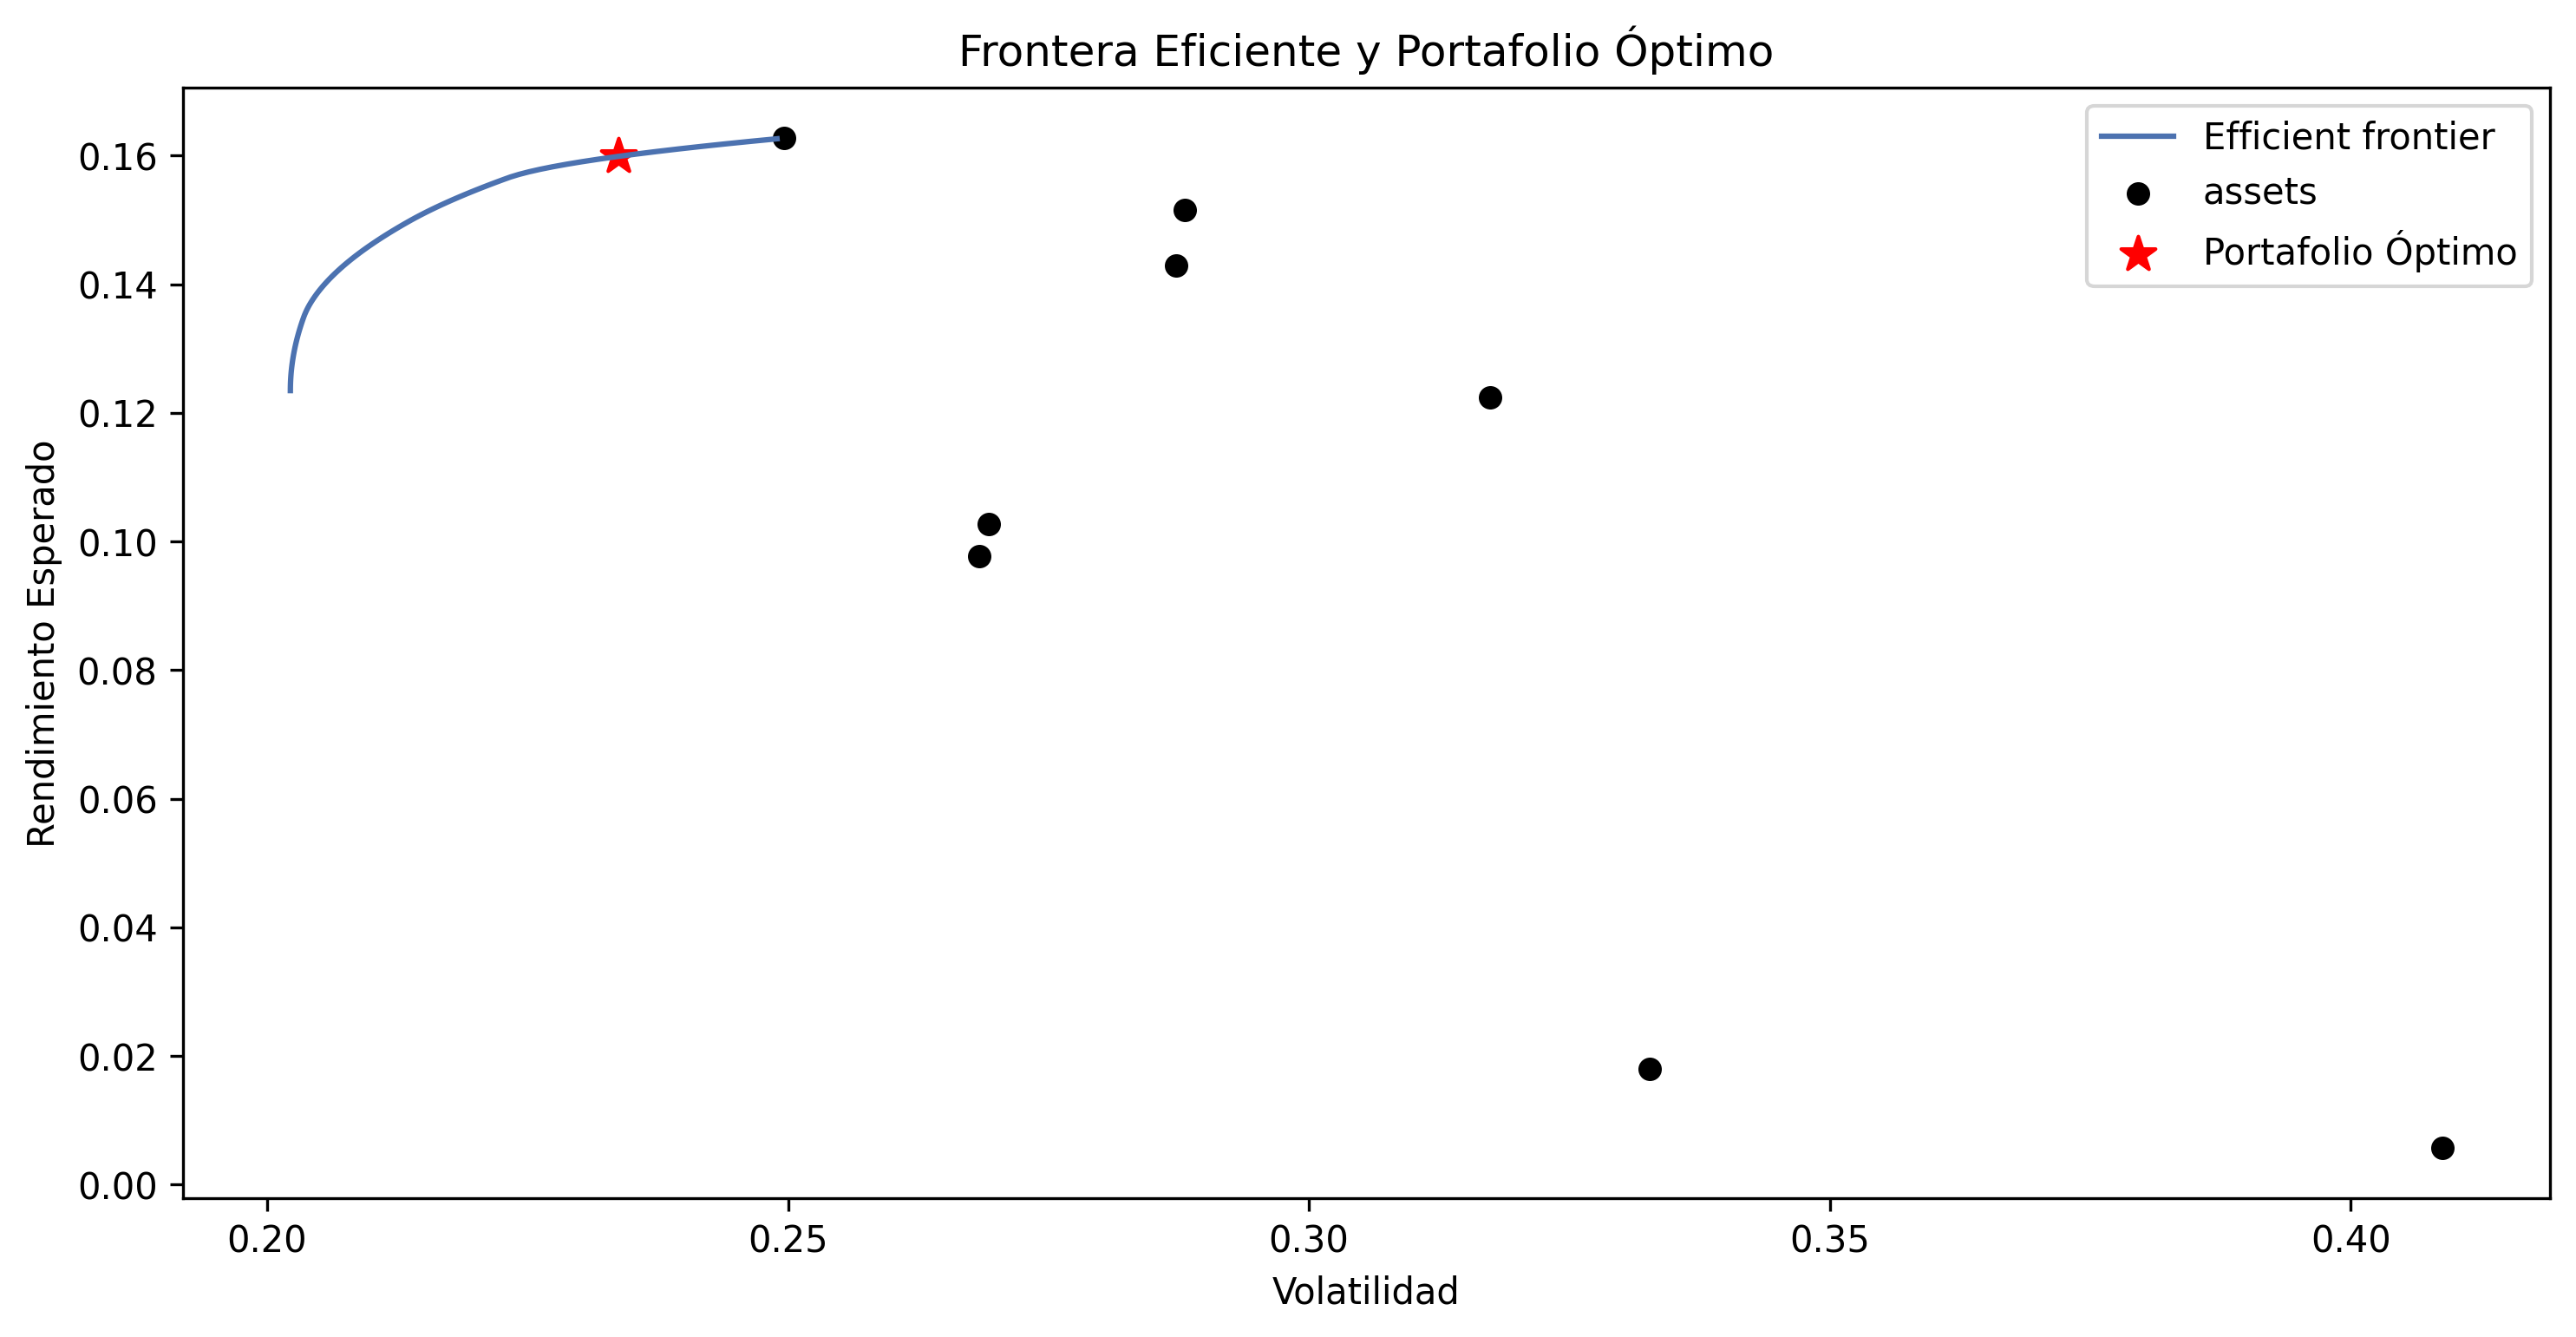

In [25]:
# Plot the efficient frontier

fig, ejes = plt.subplots(figsize=(10,5), dpi = 300)
plotting.plot_efficient_frontier(ef, ax= ejes, show_assets = True)
ejes.scatter(volatilidad, rendimiento_esperado, marker = '*', color = 'red', s = 100, label = 'Portafolio Óptimo')
ejes.set_title('Frontera Eficiente y Portafolio Óptimo')
ejes.set_xlabel('Volatilidad')
ejes.set_ylabel('Rendimiento Esperado')
ejes.legend()
plt.show()

In [26]:
ef = EfficientFrontier(mu, S)

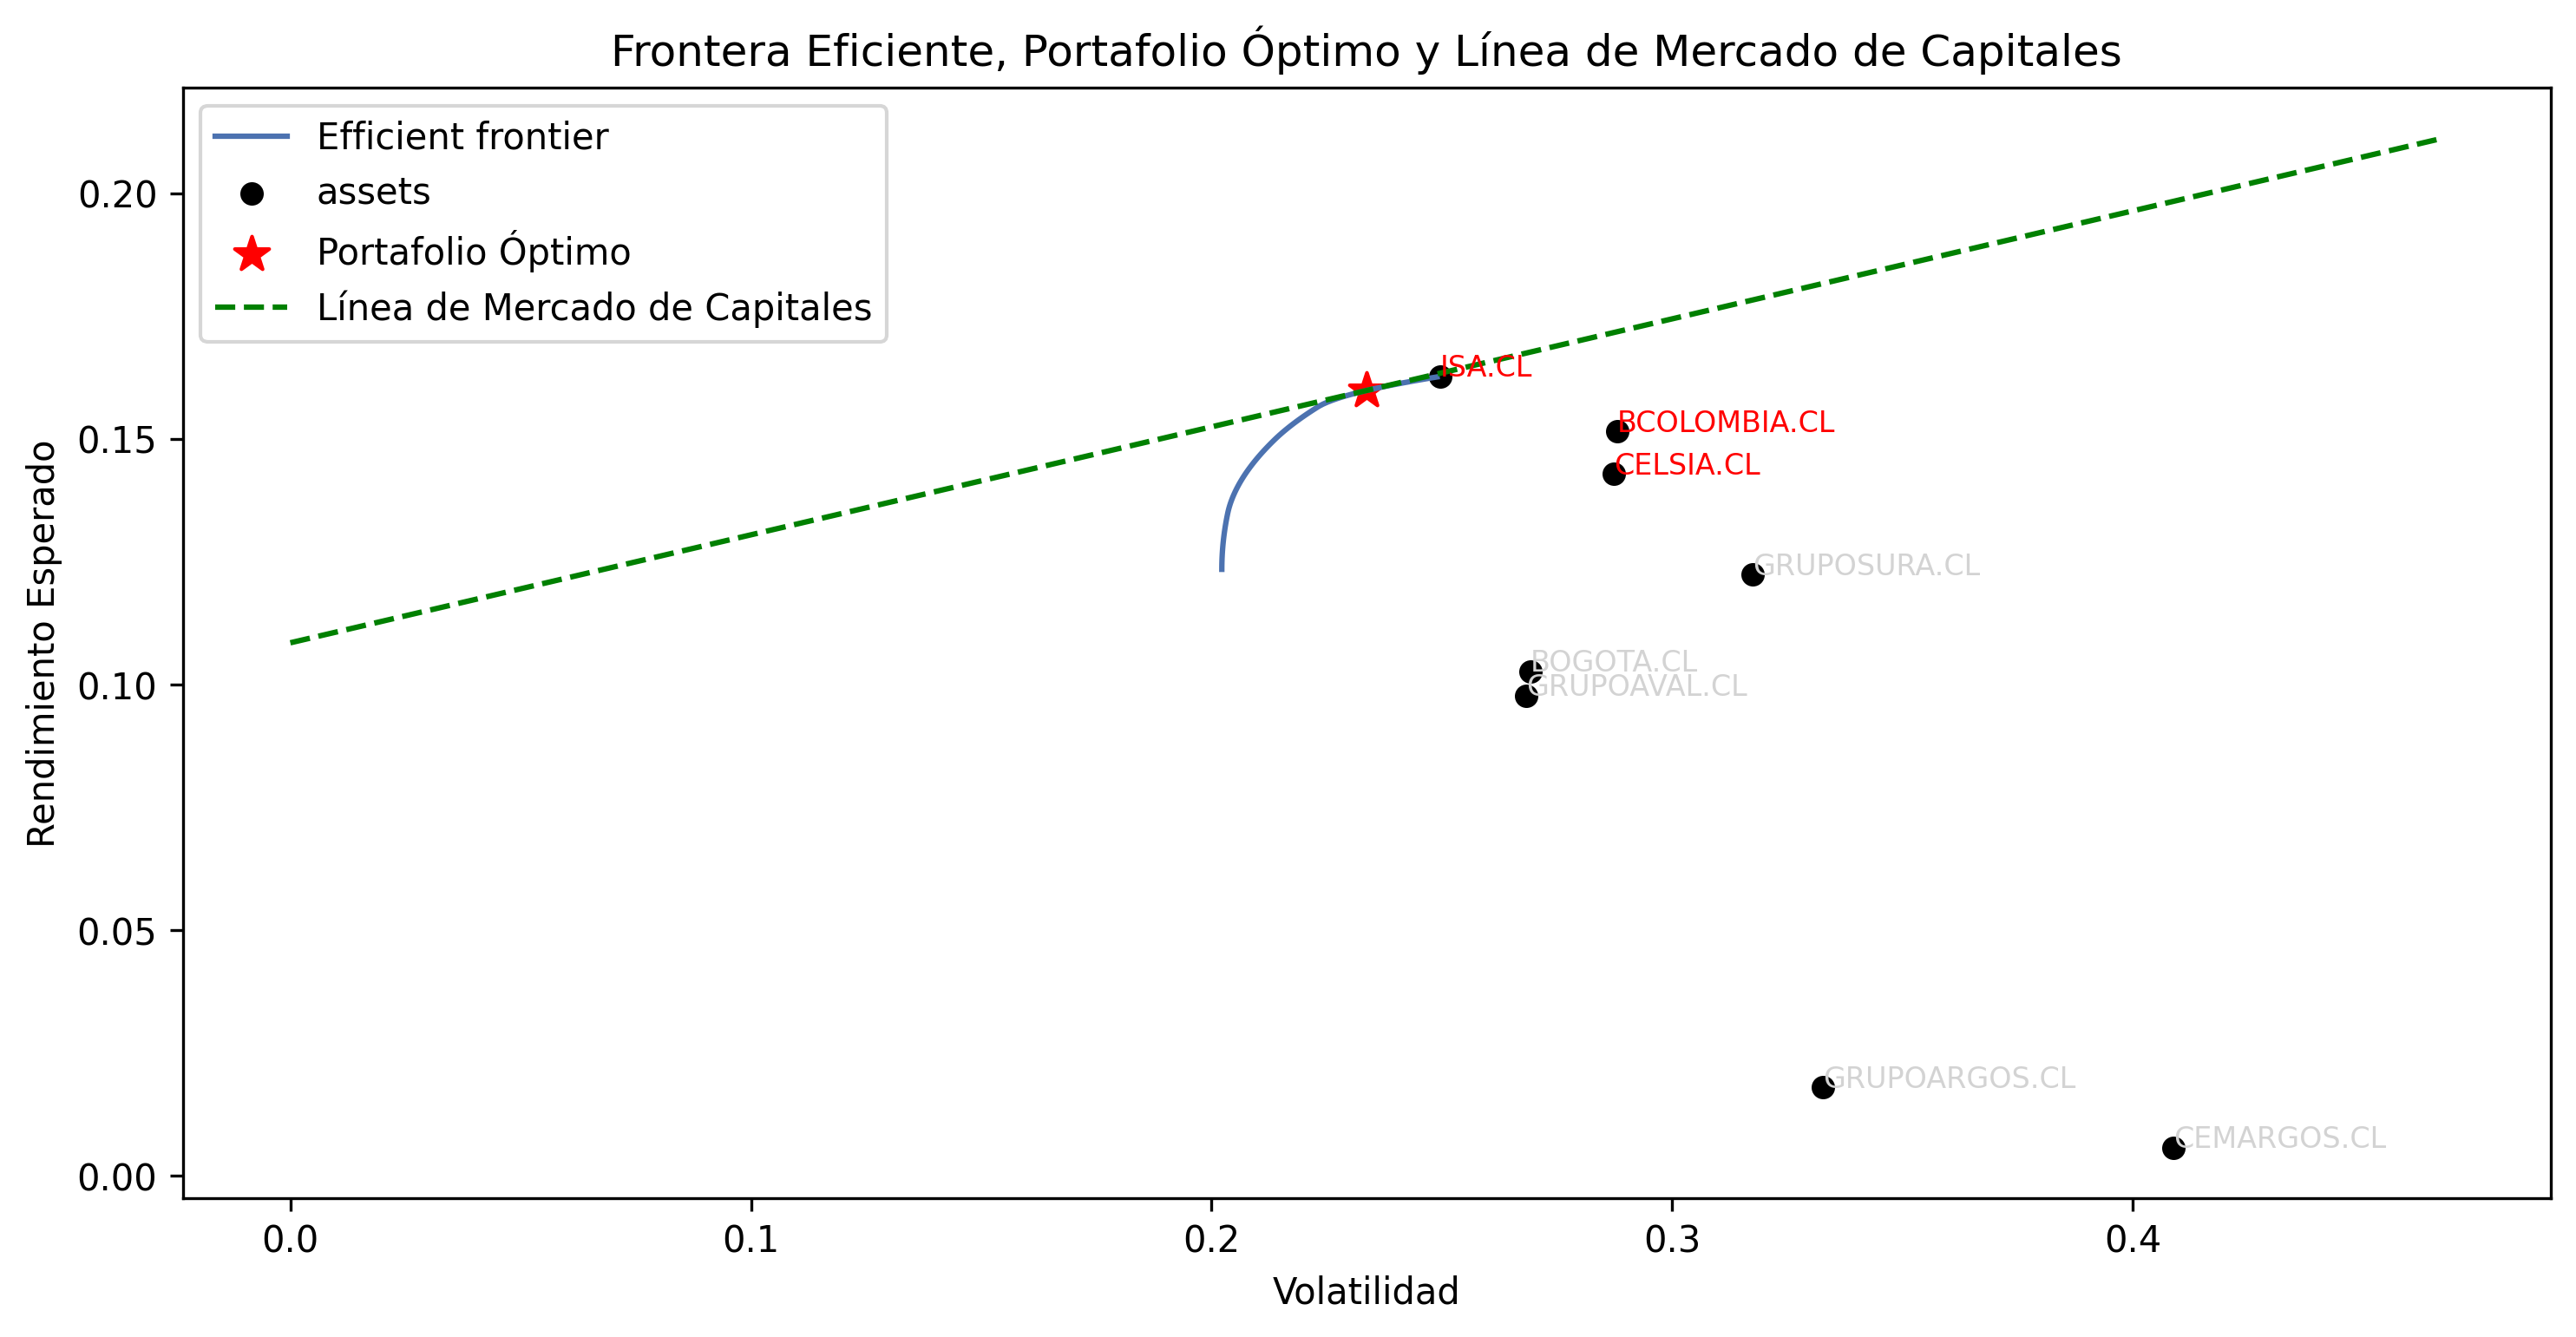

In [27]:
# Calculate the efficient frontier with the respective assets that make up the optimal portfolio
# also calculate and plot the capital market line


# Function to calculate the CML
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento_esperado - tasa_libre_riesgo) / (volatilidad - 0)  # Slope of the CML
    return lambda x: tasa_libre_riesgo + slope * x

# Plot the efficient frontier
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)

# Mark the optimal portfolio
ejes.scatter(volatilidad, rendimiento_esperado, marker='*', color='red', s=100, label='Portafolio Óptimo')

for activo, peso in pesos_optimizados.items():
    # Calculate the volatility and expected return of the asset
    volatilidad_activo = S.loc[activo, activo] ** 0.5
    retorno_esperado_activo = mu[activo]

    # Mark the asset on the graph
    ejes.annotate(activo, 
                  (volatilidad_activo, retorno_esperado_activo), 
                  color='red' if peso > 0 else 'lightgray', 
                  fontsize=8)  # Change to light gray color and reduce font size

# Plot the CML
cml = capital_market_line(tasa_libre_riesgo)
x = np.linspace(0, volatilidad * 2, 100)  # Adjust the x-axis range to avoid error
ejes.plot(x, cml(x), color="green", linestyle="--", label="Línea de Mercado de Capitales")

# Plot details
ejes.set_title('Frontera Eficiente, Portafolio Óptimo y Línea de Mercado de Capitales')
ejes.set_xlabel('Volatilidad')
ejes.set_ylabel('Rendimiento Esperado')
ejes.legend()
plt.show()

In [28]:
rendimiento_esperado1, volatilidad1, razon_sharpe1 = ef.portfolio_performance(verbose=True)

Expected annual return: 16.3%
Annual volatility: 24.9%
Sharpe Ratio: 0.57


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9888\1739156789.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


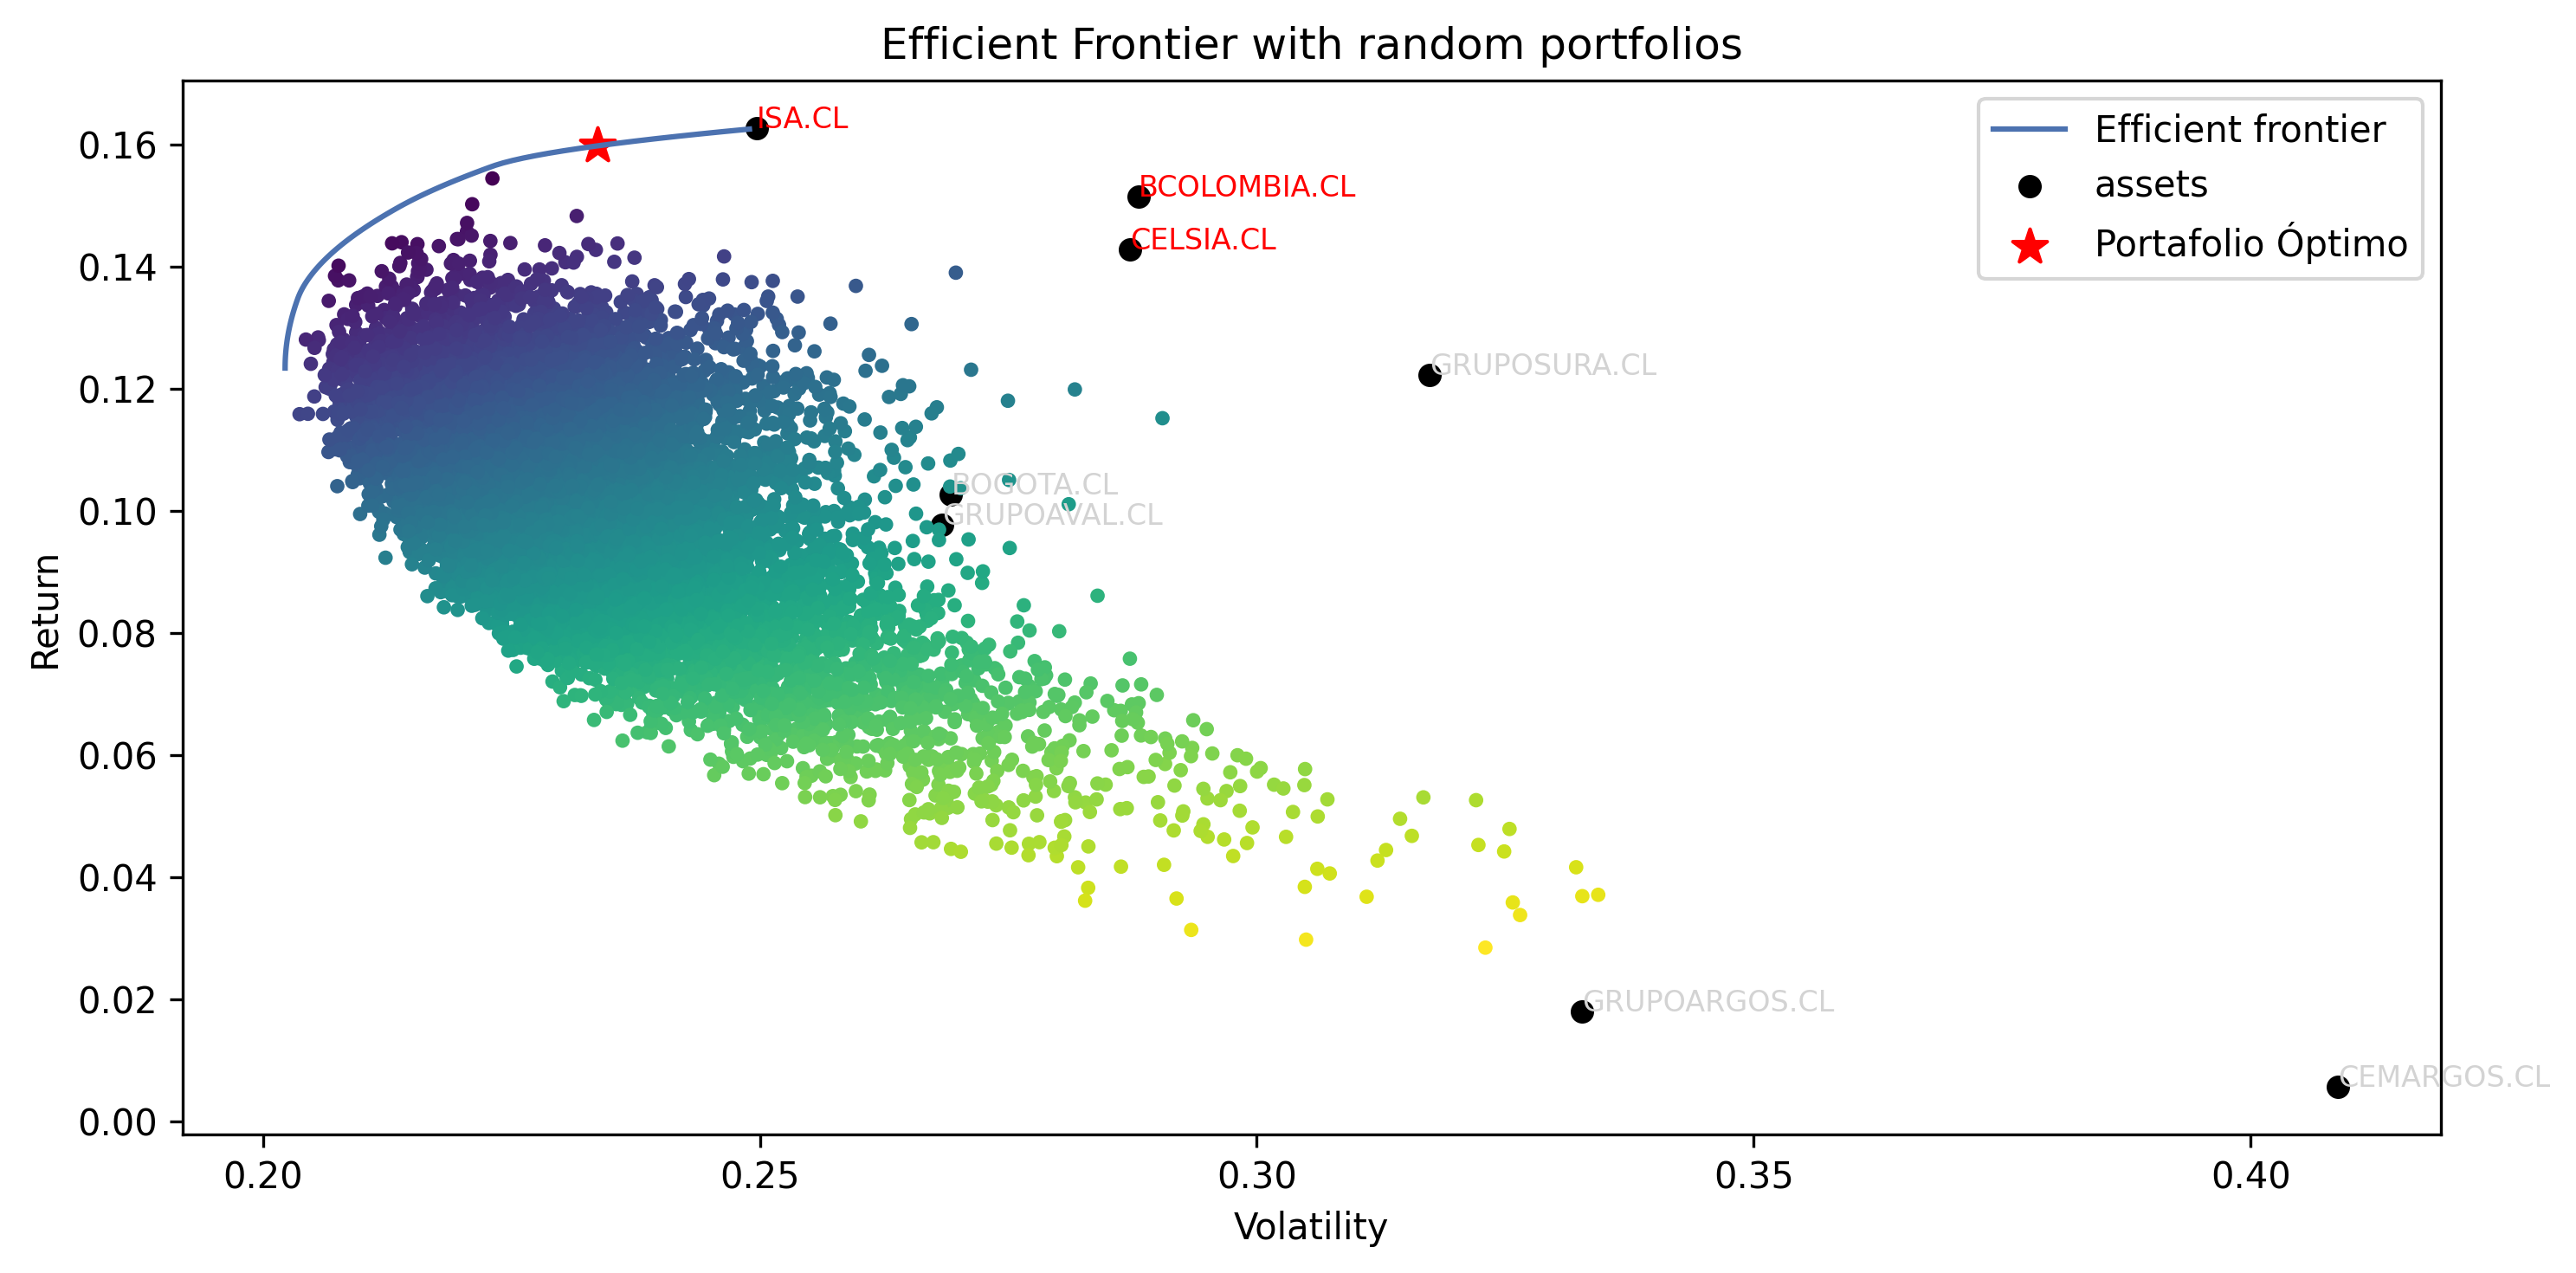

In [34]:
# This graph is the same as the previous one, except that it adds the Monte Carlo simulation

ef = EfficientFrontier(mu, S)

# Plot the efficient frontier
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)

# Mark the optimal portfolio
ejes.scatter(volatilidad, rendimiento_esperado, marker='*', color='red', s=100, label='Portafolio Óptimo')

for activo, peso in pesos_optimizados.items():
    # Calculate the volatility and expected return of the asset
    volatilidad_activo = S.loc[activo, activo] ** 0.5
    retorno_esperado_activo = mu[activo]

    # Mark the asset on the graph
    ejes.annotate(activo, 
                  (volatilidad_activo, retorno_esperado_activo), 
                  color='red' if peso > 0 else 'lightgray', 
                  fontsize=8)  # Change to light gray color and reduce font size

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ejes.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ejes.set_title("Efficient Frontier with random portfolios")
ejes.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_9888\3232738079.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


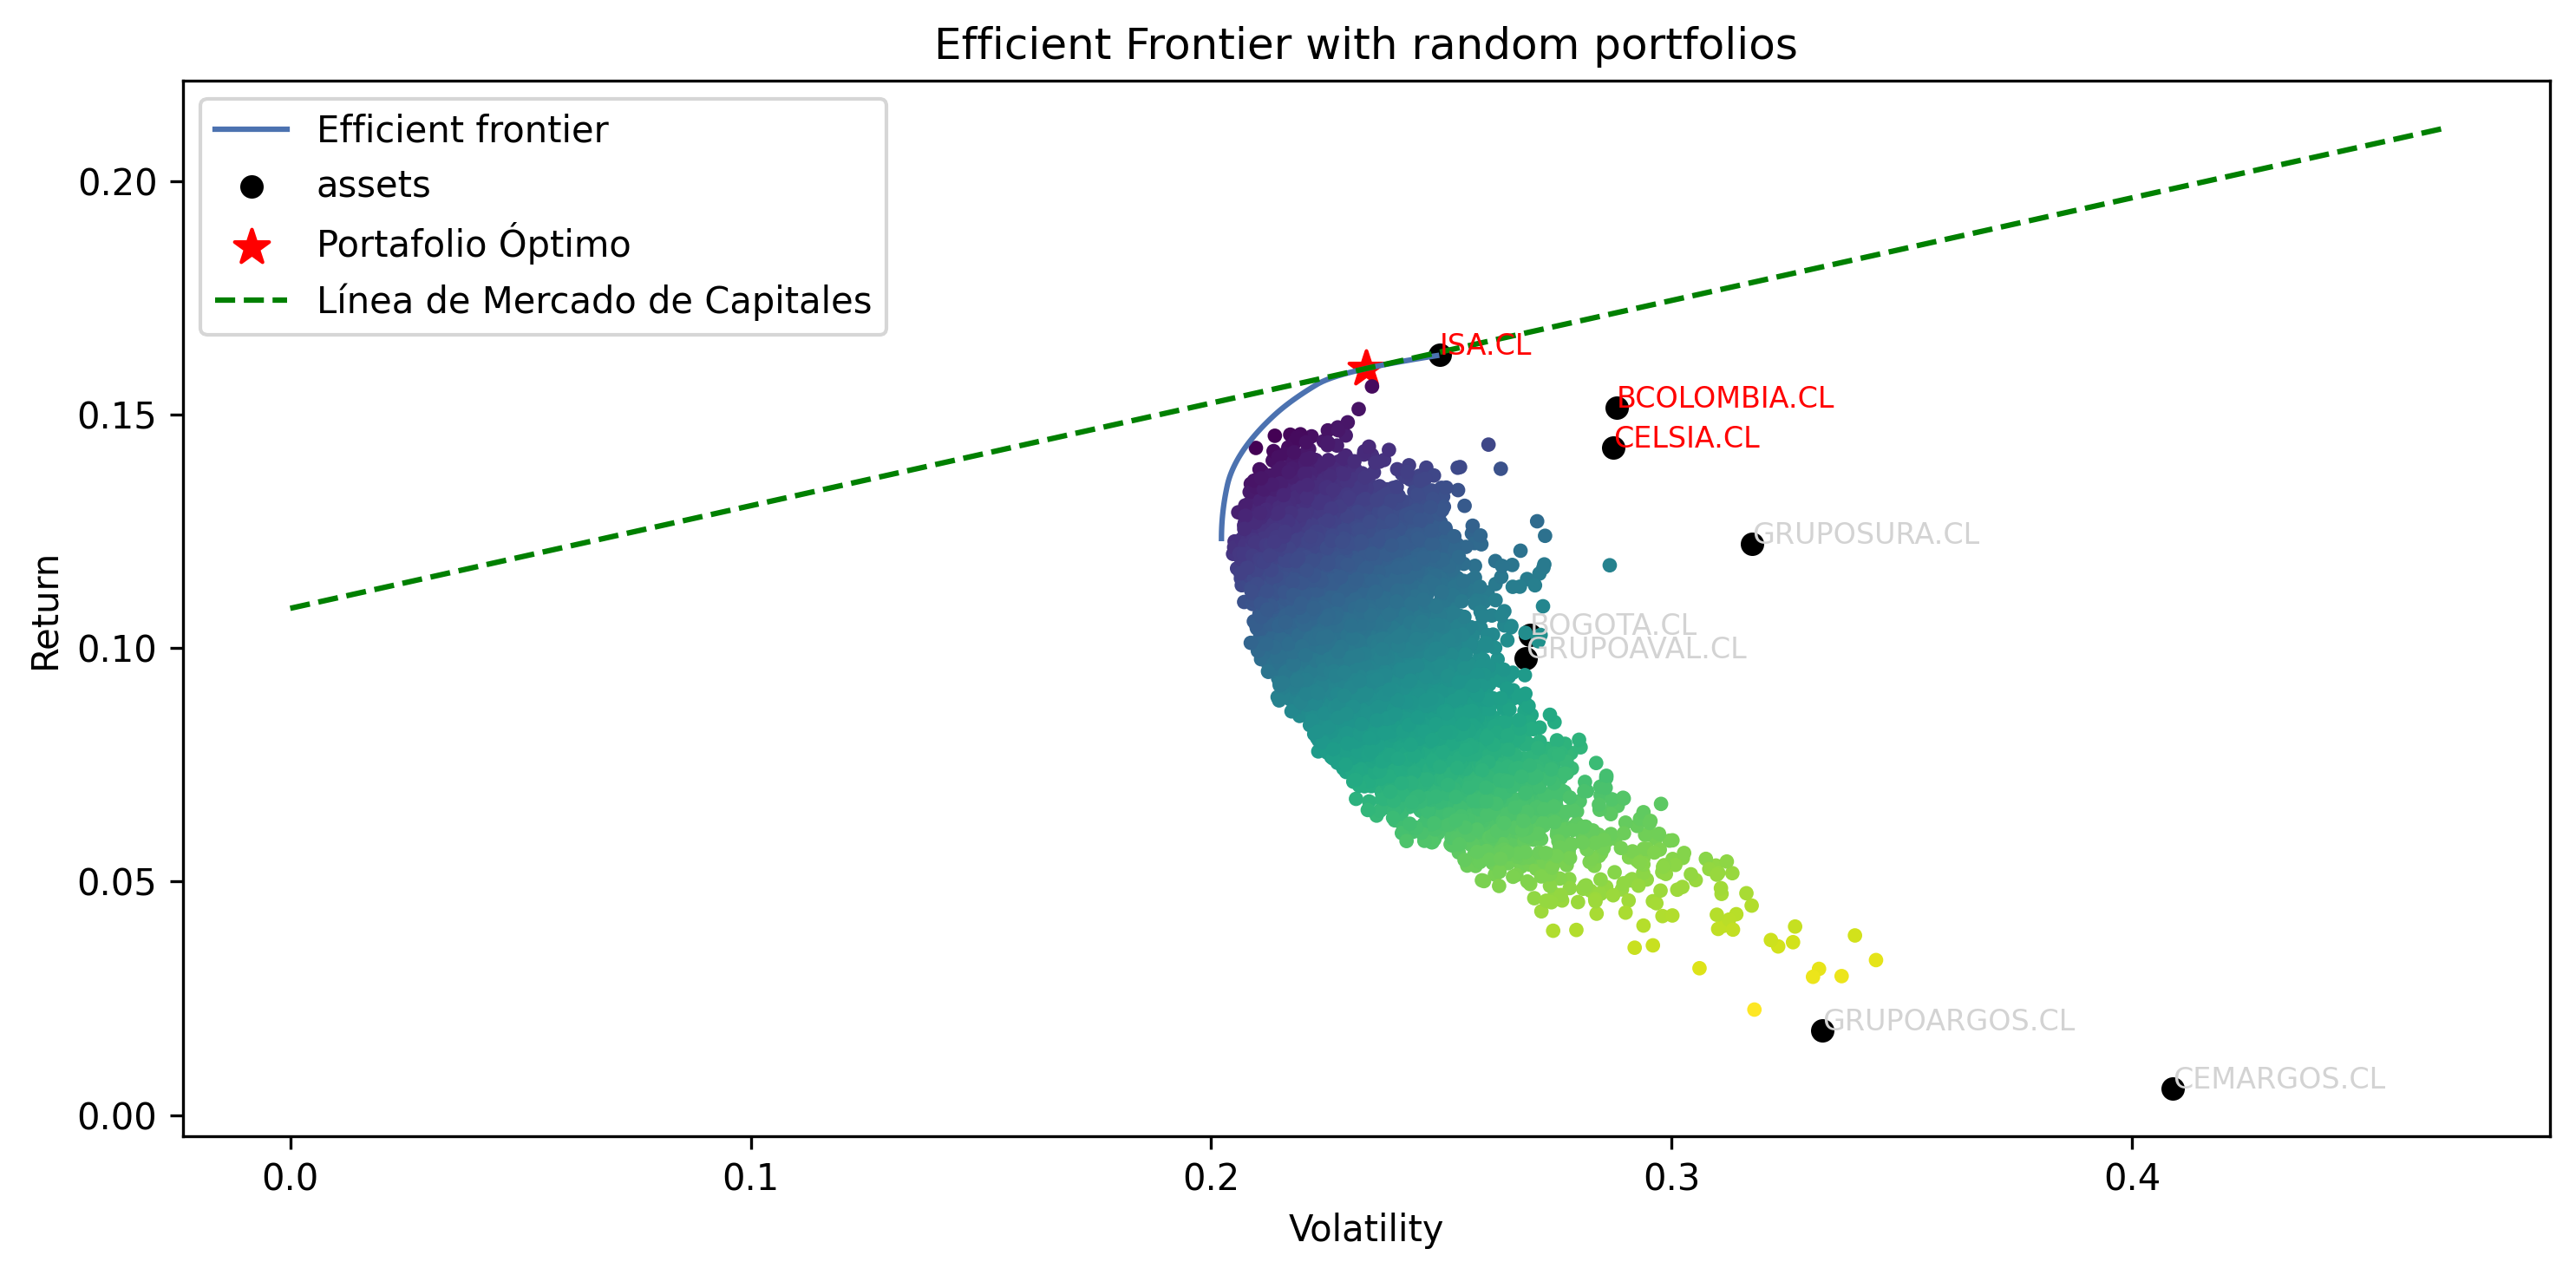

In [32]:
ef = EfficientFrontier(mu, S)

# Function to calculate the CML
def capital_market_line(tasa_libre_riesgo):
    slope = (rendimiento_esperado - tasa_libre_riesgo) / (volatilidad - 0)  # Slope of the CML
    return lambda x: tasa_libre_riesgo + slope * x

# Plot the efficient frontier
fig, ejes = plt.subplots(figsize=(10, 5), dpi=300)
plotting.plot_efficient_frontier(ef, ax=ejes, show_assets=True)

# Mark the optimal portfolio
ejes.scatter(volatilidad, rendimiento_esperado, marker='*', color='red', s=100, label='Portafolio Óptimo')

for activo, peso in pesos_optimizados.items():
    # Calculate the volatility and expected return of the asset
    volatilidad_activo = S.loc[activo, activo] ** 0.5
    retorno_esperado_activo = mu[activo]

    # Mark the asset on the graph
    ejes.annotate(activo, 
                  (volatilidad_activo, retorno_esperado_activo), 
                  color='red' if peso > 0 else 'lightgray', 
                  fontsize=8)  # Change to light gray color and reduce font size

# Plot the CML
cml = capital_market_line(tasa_libre_riesgo)
x = np.linspace(0, volatilidad * 2, 100)  # Ajuste en el rango de x para evitar el error
ejes.plot(x, cml(x), color="green", linestyle="--", label="Línea de Mercado de Capitales")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ejes.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ejes.set_title("Efficient Frontier with random portfolios")
ejes.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()